<a href="https://colab.research.google.com/github/12frog345/things/blob/main/notebooks/infarctImageDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infarct Image Demo Notebook

## 📌 Overview
**InfarctImage** is a LoRA-based model fine-tuned on **Stable Diffusion 2.1** to generate realistic images of individuals simulating a heart attack. This model was developed to facilitate synthetic dataset generation for human activity recognition and medical emergency monitoring applications.

This notebook demonstrates how to use the InfarctImage library to generate images of heart attack simulations on the fly or work with the Kaggle dataset pre generated.

Ensure that you have the necessary dependencies installed before running the notebook.

In [1]:
# Install required libraries
! pip install diffusers torch torchvision kaggle

# Install the library from the repository
! pip install git+https://github.com/Turing-IA-IHC/InfarctImage.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# If you prefer to download the repository and run this nootebook locally uncomment the following lines:
# import sys
# sys.path.insert(0, "../")

## Method 1: Using the model directly

In [ ]:
# Using the model directly
from diffusers import DiffusionPipeline
import torch
# Load the base model
infarct_pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float16, use_safetensors=True)
# Load LoRA weights
infarct_pipe.load_lora_weights("Gavit0/InfarctImage")
# Move to GPU if available
infarct_pipe.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print("Model loaded successfully!")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

sd-2.1-infarct-000010.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Model loaded successfully!


In [ ]:
prompt = ("cat"
         )
negative_prompt = (''
        )
trigger = "Person with expression of joy due to a cat on their lap, "
full_prompt = f"{trigger}, {prompt}"

image = infarct_pipe(prompt=full_prompt, negative_prompt=negative_prompt,
          guidance_scale=0, num_inference_steps=4).images[0]
image

  0%|          | 0/3 [00:00<?, ?it/s]

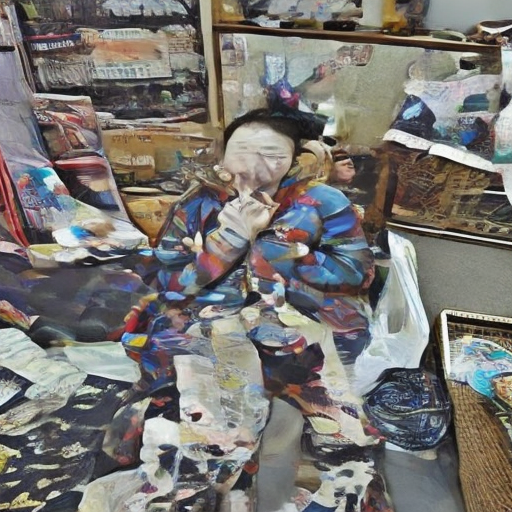

In [ ]:
prompt = ("cat"
         )
negative_prompt = (''
        )
trigger = "Person with expression of joy due to a cat on their lap, "
full_prompt = f"{trigger}, {prompt}"

image = infarct_pipe(prompt=full_prompt, negative_prompt=negative_prompt,
          guidance_scale=0, num_inference_steps=3).images[0]
image

## Method 2: Using Infarct library (recomended)

In [ ]:
# Import the custom library
from infarctimage import InfarctImageCreator

In [ ]:
# Initialize the infarct model
infarct_model = InfarctImageCreator()

  0%|          | 0/40 [00:00<?, ?it/s]

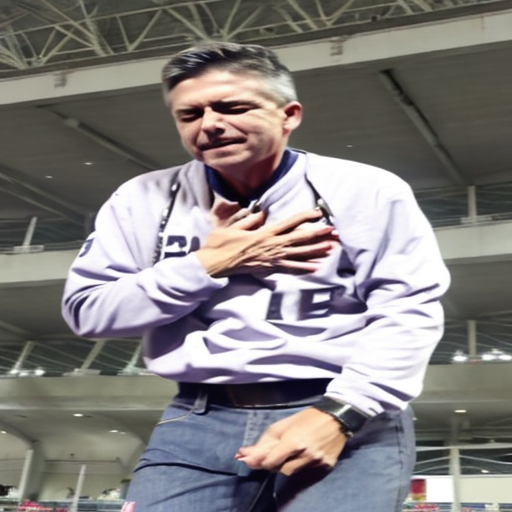

In [ ]:
# Generate images
prompt = ("Elderly man at a sports stadium surrounded by a crowd, "
          "clutching his chest with a distressed look, indicating a heart attack."
         )
image = infarct_model.generate_image(prompt)
image

## Using images pre-generated dataset

In [ ]:
# Import the custom library
from infarctimage import InfarctImageDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

torch.Size([3, 3, 256, 256])
Found 3 training images.
Image path: sd-2.1-infarct-lora-010-13049175.jpg


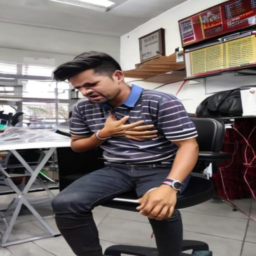

In [ ]:
# Load dataset. If not exist download dataset from Kaggle

# This feature will be available soon

## Define transformations
#transform = transforms.Compose([
#    transforms.Resize((256, 256)),  # Resize images to 128x128
#    transforms.ToTensor(),  # Convert images to tensor
#])
#
## Create dataset and DataLoader
#dataset = InfarctImageDataset(split='train', transform=transform)
#dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
#
## Iterate through batches
#for batch in dataloader:
#    print(batch.shape)  # Expected output: (batch_size, 3, 128, 128)
#    break
#
## Load and display dataset images
#print(f"Found {len(dataset)} training images.")
#
## Display the first image path
#print("Image path:", dataset.image_files[0])
#image = dataset[0].permute(1, 2, 0).numpy()
#image_pil = F.to_pil_image(image)
#image_pil

## Using images dataset created on the fly

In [ ]:
# Import the custom library
from infarctimage import InfarctImageCreator
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

# Initialize the infarct model
infarct_model = InfarctImageCreator()

Loading base model with device: cuda ...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Applying LoRA fine-tuned weights...
Model loaded successfully.


In [ ]:
# Create and save images dataset to disk
prompts = [
    "Elderly man at a sports stadium surrounded by a crowd, clutching his chest with a distressed look, indicating a heart attack.",
    "Elderly woman at a park, clutching his chest with a distressed look, indicating a heart attack."
  ]
infarct_model.generate_to_disk(prompts, num_images=4, save_dir='infarct_images')

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generated 4 images saved to infarct_images


  0%|          | 0/40 [00:00<?, ?it/s]

torch.Size([1, 3, 256, 256])


  0%|          | 0/40 [00:00<?, ?it/s]

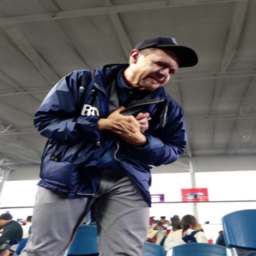

In [ ]:
# Create and using images dataset on the fly
prompts = [
    "Elderly man at a sports stadium surrounded by a crowd, clutching his chest with a distressed look, indicating a heart attack.",
    "Elderly woman at a park, clutching his chest with a distressed look, indicating a heart attack."
  ]

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert images to tensor
])

# Create dataset and DataLoader
dataset = infarct_model.generate_dataset(prompts, num_images=8, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Iterate through batches
for batch in dataloader:
    print(batch.shape)  # Expected output: (batch_size, 3, 128, 128)
    break

# Display the first image
image = dataset[0].permute(1, 2, 0).numpy()
image_pil = F.to_pil_image(image)
image_pil
